In [1]:
## tools

from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [2]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("What is the latest research on quantum computing?")

'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogr'

In [4]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [5]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [6]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [8]:
tavily.invoke("Provide me the recent AI news?")

[{'title': 'AI News | Latest AI News, Analysis & Events',
  'url': 'https://www.artificialintelligence-news.com/',
  'content': 'March 4, 2025\nAutoscience Carl: The first AI scientist writing peer-reviewed papers\nApplications\nMarch 3, 2025\nDeep Learning\nAlibaba Qwen QwQ-32B: Scaled reinforcement learning showcase\nArtificial Intelligence\nMarch 6, 2025\nDeepSeek-R1 reasoning models rival OpenAI in performance\nArtificial Intelligence\nJanuary 20, 2025\nNew AI training techniques aim to overcome current challenges\nDeep & Reinforcement Learning\nNovember 28, 2024 [...] Artificial Intelligence\nMarch 14, 2025\nOpenAI and Google call for US government action to secure AI lead\n\nArtificial Intelligence\nMarch 14, 2025\nCBRE: Leveraging Artificial Intelligence for business growth\n\nAGI\nMarch 14, 2025\nManus AI agent: breakthrough in China’s agentic AI\n\nApplications\nMarch 13, 2025\nServiceNow deploys AI agents to boost enterprise workflows [...] AI News\nMarch 20, 2025\nUK ministe

In [7]:
## combine all these tools in the list
tools=[arxiv, wiki, tavily]

In [8]:
## Initialize the LLM Model
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-qwq-32b")


In [9]:
llm.invoke("What is AI")

AIMessage(content='\n<think>\nOkay, the user is asking, "What is AI?" I need to explain this clearly. Let me start by defining AI in simple terms. Maybe mention that AI stands for Artificial Intelligence. Should I explain it as making machines intelligent? That\'s a common approach. But I should make sure to cover both the basic definition and some key aspects.\n\nHmm, perhaps I should break it down into parts. First, the basic definition: AI refers to the simulation of human intelligence in machines. But wait, does that cover everything? Maybe add that these machines can perform tasks that typically require human intelligence, like learning, problem-solving, decision-making, etc.\n\nNow, I should consider different types of AI. Maybe mention the two main categories: Narrow or Weak AI and General or Strong AI. Narrow AI is for specific tasks, like voice assistants or recommendation systems. General AI would be more human-like, but that\'s still theoretical. Also, maybe touch on the tec

In [10]:
llm_with_tools=llm.bind_tools(tools=tools)


In [16]:
## Execute this call
llm_with_tools.invoke("What is the recent news on AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_qcsv', 'function': {'arguments': '{"query": "recent news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 184, 'prompt_tokens': 356, 'total_tokens': 540, 'completion_time': 0.453847725, 'prompt_time': 0.035121491, 'queue_time': 0.23411395499999998, 'total_time': 0.488969216}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_3796682456', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-3d7fc64c-2690-400d-af23-dd353c25d278-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent news on AI'}, 'id': 'call_qcsv', 'type': 'tool_call'}], usage_metadata={'input_tokens': 356, 'output_tokens': 184, 'total_tokens': 540})

In [17]:
## Execute this call
llm_with_tools.invoke("What is the latest research on quantum computing?")


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_0byk', 'function': {'arguments': '{"query": "quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 234, 'prompt_tokens': 357, 'total_tokens': 591, 'completion_time': 0.579099459, 'prompt_time': 0.021951899, 'queue_time': 0.256202107, 'total_time': 0.601051358}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-3b75b026-27f6-4c12-92af-7b43b88d2fac-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum computing'}, 'id': 'call_0byk', 'type': 'tool_call'}], usage_metadata={'input_tokens': 357, 'output_tokens': 234, 'total_tokens': 591})

In [19]:
## Execute this call
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_3g6d', 'function': {'arguments': '{"query": "Machine learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 450, 'prompt_tokens': 353, 'total_tokens': 803, 'completion_time': 1.107638067, 'prompt_time': 0.045242907, 'queue_time': 0.256131906, 'total_time': 1.152880974}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_fbb7e6cc39', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-738d7565-8e74-4d66-9b64-c771a07ac103-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Machine learning'}, 'id': 'call_3g6d', 'type': 'tool_call'}], usage_metadata={'input_tokens': 353, 'output_tokens': 450, 'total_tokens': 803})

## Workflow 

In [11]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage ## Human message or AI message
from typing import Annotated  ## labelling
from langgraph.graph.message import add_messages  ## Reducers in Langgraph

In [12]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    

In [13]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

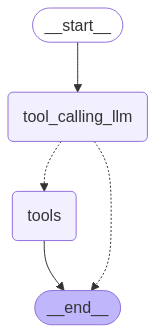

In [ ]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_6w4t)
 Call ID: call_6w4t
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [27]:
messages=graph.invoke({"messages":"Hi My name is Krish"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi My name is Krish
================================== Ai Message ==================================

Hello Krish! Nice to meet you. How can I assist you today? Let me know if you have any questions or need help with anything specific! 😊


In [ ]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [19]:
messages=graph.invoke({"messages":"What is the recent AI news and then please tell me the recent research paper on quantum computing?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news and then please tell me the recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_a0v7)
 Call ID: call_a0v7
  Args:
    query: recent AI news
  arxiv (call_0v1h)
 Call ID: call_0v1h
  Args:
    query: recent quantum computing research
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "AI News | Latest AI News, Analysis & Events", "url": "https://www.artificialintelligence-news.com/", "content": "March 4, 2025\nAutoscience Carl: The first AI scientist writing peer-reviewed papers\nApplications\nMarch 3, 2025\nDeep Learning\nAlibaba Qwen QwQ-32B: Scaled reinforcement learning showcase\nArtificial Intelligence\nMarch 6, 2025\nDeepSeek-R1 reasoning models rival OpenAI in performance\nArtifici